# The Neural Population Oscillator

On the neural population level, the mesoscopic currents are modelled by the interaction of excitatory and inhibitory populations.

The predict oscillatory dynamics of e.g. the local field potential and the EEG.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, tanh, around
from matplotlib.pyplot import subplots
from scipy.integrate import odeint


In [2]:
def sigmoid(u):
    return tanh(u)

def oscillator(y, t, h_ex, h_in, pars, sr, time_stop):
               
    tau_ex, tau_in, c2, c4, c_EE, c_EI = pars

    dydt = (

        (h_ex - y[0] - c2*sigmoid(y[1]) + c_EE*sigmoid(y[0]))*tau_ex,
         
        (h_in - y[1] - c4*sigmoid(y[1]) + c_EI*sigmoid(y[0]))*tau_in

    )

    return dydt
        

End of run: [ 1.894 -1.238]



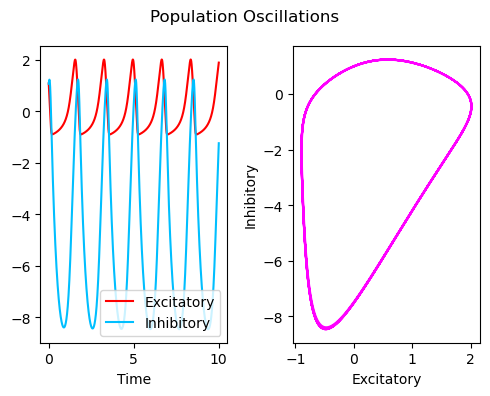

In [14]:
# Input parameter
h_ex_0 = -7.
h_in_0 = -4.0

# Oscillator parameters
pars = (1, 2.5, 10, 0, 5, 10) # Homoclinic

# Initial conditions
y_ini = (1.088, 1.071)

# Time array
time_stop = 10
sr        = 1000
time      = linspace(start=0, stop=time_stop, num=time_stop*sr)

pulse = []

# Simulation
y = odeint(func=oscillator, y0=y_ini, t=time, 
          args=(h_ex_0, h_in_0, pars, sr, time_stop), 
          hmax=0.1)

fig, ax = subplots(ncols=2, figsize=(5, 4))

ax[0].plot(time, y[:,0], color='red', label='Excitatory');
ax[0].plot(time, y[:,1], color='deepskyblue', label='Inhibitory');
ax[1].plot(y[:,0], y[:,1], color='magenta');
ax[0].legend(loc='lower right')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Excitatory')
ax[1].set_ylabel('Inhibitory')


chars = 'Population Oscillations'

fig.suptitle(chars)

fig.tight_layout()

# Show final values of all variables
print('End of run:', around(y[-1,:],3))
print('')


# Quiver 2V analysis

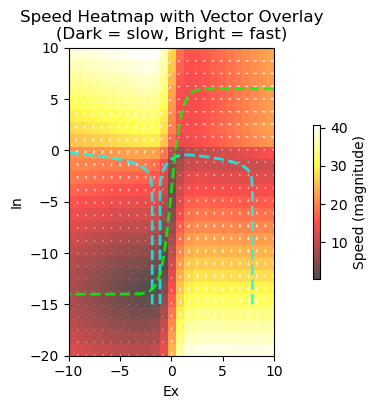

Speed statistics:
Min speed: 0.4984
Max speed: 40.7814
Mean speed: 19.6661
Areas with speed < 9.8331 represent slow dynamics


In [7]:
def dX_dt(X):
    """ Return the rates at all positions. """
    h_ex, h_in, tau_ex, tau_in, c2, c4, c_EE, c_EI = (-7.1, -4., 1, 1.5, 10, 0, 5, 10)  # SNIC
    
    return np.array([ (h_ex - X[0] - c2*tanh(X[1]) + c_EE*tanh(X[0]))*tau_ex,
                   (   h_in - X[1] - c4*tanh(X[1]) + c_EI*tanh(X[0]))*tau_in
                 ])

# Create grid
x = np.linspace(-10, 10, 25)
y = np.linspace(-20, 10, 25)
X, Y = np.meshgrid(x, y)

# Calculate vector field and magnitudes
DX = np.zeros_like(X)
DY = np.zeros_like(Y)
magnitudes = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX = dX_dt([X[i,j], Y[i,j]])
        DX[i,j] = dX[0]
        DY[i,j] = dX[1]
        magnitudes[i,j] = np.sqrt(dX[0]**2 + dX[1]**2)  # Calculate magnitude

# Add nullclines
x_nc = np.linspace(-10, 10, 100)
y_nc = np.linspace(-15, 10, 100)
X_nc, Y_nc = np.meshgrid(x_nc, y_nc)

# dx/dt = 0 nullcline
dX_null = np.zeros_like(X_nc)
for i in range(X_nc.shape[0]):
    for j in range(X_nc.shape[1]):
        dX_null[i,j] = dX_dt([X_nc[i,j], Y_nc[i,j]])[0]

# dy/dt = 0 nullcline  
dY_null = np.zeros_like(Y_nc)
for i in range(Y_nc.shape[0]):
    for j in range(Y_nc.shape[1]):
        dY_null[i,j] = dX_dt([X_nc[i,j], Y_nc[i,j]])[1]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 4))

# The magnitude as a heatmap with arrows
im = ax1.imshow(magnitudes, extent=[-10, 10, -20, 10], 
               origin='lower', cmap='hot', alpha=0.7)
q1 = ax1.quiver(X, Y, DX, DY, color='white', 
               angles='xy', scale_units='xy', scale=50,
               width=0.004, alpha=0.8)

# Add colorbar for heatmap
cbar1 = plt.colorbar(im, ax=ax1, shrink=0.5)
cbar1.set_label('Speed (magnitude)')

# Add nullclines to second plot
ax1.contour(X_nc, Y_nc, dX_null, levels=[0], colors='cyan', linewidths=2, linestyles='--', alpha=0.8)
ax1.contour(X_nc, Y_nc, dY_null, levels=[0], colors='lime', linewidths=2, linestyles='--', alpha=0.8)

ax1.set_xlabel('Ex')
ax1.set_ylabel('In')
ax1.set_title('Speed Heatmap with Vector Overlay\n(Dark = slow, Bright = fast)')
ax1.set_xlim([-10, 10])
ax1.set_ylim([-20, 10])
ax1.set_aspect('equal')

# plt.tight_layout()
plt.show()

# Print some statistics about the speeds
print(f"Speed statistics:")
print(f"Min speed: {magnitudes.min():.4f}")
print(f"Max speed: {magnitudes.max():.4f}")
print(f"Mean speed: {magnitudes.mean():.4f}")
print(f"Areas with speed < {magnitudes.mean()/2:.4f} represent slow dynamics")

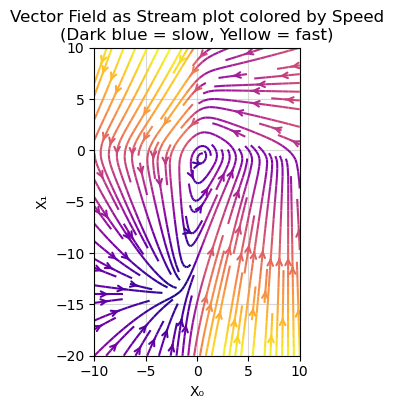

In [10]:
def dX_dt(X):
    """ Return the rates at all positions. """
    h_ex, h_in, tau_ex, tau_in, c2, c4, c_EE, c_EI = (-6.1, -4., 1, 1.5, 10, 0, 5, 10)
    
    return np.array([ (h_ex - X[0] - c2*tanh(X[1]) + c_EE*tanh(X[0]))*tau_ex,
                   (h_in - X[1] - c4*tanh(X[1]) + c_EI*tanh(X[0]))*tau_in
                 ])

# Grid
x = np.linspace(-10, 10, 25)
y = np.linspace(-20, 10, 25)
X, Y = np.meshgrid(x, y)

# Vector field and magnitudes
DX = np.zeros_like(X)
DY = np.zeros_like(Y)
magnitudes = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX = dX_dt([X[i,j], Y[i,j]])
        DX[i,j] = dX[0]
        DY[i,j] = dX[1]
        magnitudes[i,j] = np.sqrt(dX[0]**2 + dX[1]**2)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 4))

# Streamlines with color mapping to magnitude
strm = ax1.streamplot(X, Y, DX, DY, color=magnitudes, cmap='plasma', 
                     linewidth=1.5, density=1.2, arrowstyle='->')

ax1.set_xlabel('X₀')
ax1.set_ylabel('X₁')
ax1.set_title('Vector Field as Stream plot colored by Speed\n(Dark blue = slow, Yellow = fast)')
ax1.set_xlim([-10, 10])
ax1.set_ylim([-20, 10])
ax1.grid(True, alpha=0.5)
ax1.set_aspect('equal')


# Current Winds

https://earth.nullschool.net/#current/wind/surface/level/orthographic=4.77,48.88,1230

